# Lung Cancer Detection

## Download Data

In [1]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/bhmdr45bh2-2.zip

--2021-06-21 11:56:46--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/bhmdr45bh2-2.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.49.27
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.49.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156614682 (149M) [application/octet-stream]
Saving to: ‘bhmdr45bh2-2.zip’

bhmdr45bh2-2.zip    100%[===================>] 149.36M  19.2MB/s    in 8.7s    

2021-06-21 11:56:55 (17.1 MB/s) - ‘bhmdr45bh2-2.zip’ saved [156614682/156614682]



## Extract Data

In [2]:
!unzip '/content/bhmdr45bh2-2.zip' -d '/tmp'

Archive:  /content/bhmdr45bh2-2.zip
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset.zip  


In [3]:
!unzip '/tmp/The IQ-OTHNCCD lung cancer dataset.zip' -d '/tmp'

Archive:  /tmp/The IQ-OTHNCCD lung cancer dataset.zip
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (1).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (10).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (100).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (101).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (102).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (103).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (104).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (105).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (106).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (107).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer data

## Splitting Data

In [4]:
import os

try:
    os.makedirs("/tmp/lung-cancer/training/benign/")
    os.makedirs("/tmp/lung-cancer/validation/benign/")
    os.makedirs("/tmp/lung-cancer/testing/benign/")

    os.makedirs("/tmp/lung-cancer/training/malignant/")
    os.makedirs("/tmp/lung-cancer/validation/malignant/")
    os.makedirs("/tmp/lung-cancer/testing/malignant/")

    os.makedirs("/tmp/lung-cancer/training/normal/")
    os.makedirs("/tmp/lung-cancer/validation/normal/")
    os.makedirs("/tmp/lung-cancer/testing/normal/")

except OSError:
    pass

In [5]:
import random
from shutil import copyfile

BENGIN_SOURCE_DIR = "/tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases"
MALIGNANT_SOURCE_DIR = "/tmp/The IQ-OTHNCCD lung cancer dataset/Malignant cases"
NORMAL_SOURCE_DIR = "/tmp/The IQ-OTHNCCD lung cancer dataset/Normal cases"

def split_data(SOURCE, TRAINING, TESTING, VAL, SPLIT_SIZE_TRAIN, SPLIT_SIZE_VAL):
    dir_content = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))
    train_size = int(len(dir_content) * SPLIT_SIZE_TRAIN)
    val_size = int(len(dir_content) * SPLIT_SIZE_VAL)
    for i, image_name in enumerate(dir_content):
        if os.path.getsize(os.path.join(SOURCE, image_name)) > 0:
            if i < train_size:
                copyfile(os.path.join(SOURCE, image_name), 
                         os.path.join(TRAINING, image_name))
            elif (i >= train_size) and (i < (train_size + val_size)):
                copyfile(os.path.join(SOURCE, image_name), 
                         os.path.join(VAL, image_name))
            else:
                copyfile(os.path.join(SOURCE, image_name), 
                         os.path.join(TESTING, image_name))

TRAINING_BENGIN_DIR = "/tmp/lung-cancer/training/benign/"
TESTING_BENGIN_DIR = "/tmp/lung-cancer/testing/benign/"
VAL_BENGIN_DIR = "/tmp/lung-cancer/validation/benign/"

TRAINING_MALIGNANT_DIR = "/tmp/lung-cancer/training/malignant"
TESTING_MALIGNANT_DIR = "/tmp/lung-cancer/testing/malignant/"
VAL_MALIGNANT_DIR = "/tmp/lung-cancer/validation/malignant/"

TRAINING_NORMAL_DIR = "/tmp/lung-cancer/training/normal/"
TESTING_NORMAL_DIR = "/tmp/lung-cancer/testing/normal/"
VAL_NORMAL_DIR = "/tmp/lung-cancer/validation/normal/"

split_size_train = .8
split_size_val = .1
split_data(BENGIN_SOURCE_DIR, TRAINING_BENGIN_DIR, 
           TESTING_BENGIN_DIR, VAL_BENGIN_DIR,
           split_size_train, split_size_val)
split_data(MALIGNANT_SOURCE_DIR, TRAINING_MALIGNANT_DIR, 
           TESTING_MALIGNANT_DIR, VAL_MALIGNANT_DIR,
           split_size_train, split_size_val)
split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, 
           TESTING_NORMAL_DIR, VAL_NORMAL_DIR,
           split_size_train, split_size_val)

In [6]:
print(len(os.listdir('/tmp/lung-cancer/training/benign/')))
print(len(os.listdir('/tmp/lung-cancer/training/malignant/')))
print(len(os.listdir('/tmp/lung-cancer/training/normal/')))
print()
print(len(os.listdir('/tmp/lung-cancer/validation/benign/')))
print(len(os.listdir('/tmp/lung-cancer/validation/malignant/')))
print(len(os.listdir('/tmp/lung-cancer/validation/normal/')))
print()
print(len(os.listdir('/tmp/lung-cancer/testing/benign/')))
print(len(os.listdir('/tmp/lung-cancer/testing/malignant/')))
print(len(os.listdir('/tmp/lung-cancer/testing/normal/')))

96
448
332

12
56
41

12
57
43


## Data Augmentation

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/lung-cancer/training/"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=.2,
    zoom_range=.2,
    fill_mode="nearest",
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(224, 224),
    batch_size=10,
    class_mode="categorical",
    color_mode='grayscale',
)

VALIDATION_DIR = "/tmp/lung-cancer/validation/"
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(224, 224),
    batch_size=10,
    class_mode="categorical",
    color_mode='grayscale',
)

TEST_DIR = "/tmp/lung-cancer/testing"
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    batch_size= 1,
    class_mode="categorical",
    color_mode='grayscale',
    shuffle = False,
)

Found 876 images belonging to 3 classes.
Found 109 images belonging to 3 classes.
Found 112 images belonging to 3 classes.


In [8]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
           'balanced',
            np.unique(train_generator.classes), 
            train_generator.classes)

weights = {}
for i, class_weight in enumerate(class_weights):
  weight = {i: class_weight}
  weights.update(weight)

In [9]:
train_generator.class_indices

{'benign': 0, 'malignant': 1, 'normal': 2}

## Modeling with Xception

In [10]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

conv_base = Xception(include_top=False, input_shape=(224,224,3))

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block13_sepconv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

model = Sequential()
model.add(layers.Conv2D(3, (3,3), padding='same',
                        input_shape=(224,224,1)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu',
                                kernel_regularizer=L2(0.01)))
model.add(layers.Dense(3, activation='softmax'))

optimizer= Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=[keras.metrics.Precision(name='precision'),
                        keras.metrics.Recall(name='recall'),
                        keras.metrics.AUC(name='auc'),
                        keras.metrics.CategoricalAccuracy(name='acc')]) 

83689472/83683744 [==============================] - 1s 0us/step


In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def __init__(self,
               desired_acc=0.5):
    self.desired_acc = desired_acc

  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>self.desired_acc):
      print(f"\nReached {self.desired_acc} accuracy so cancelling training!")
      self.model.stop_training = True

In [12]:
epochs = 100
callbacks = myCallback(0.98)
history = model.fit(train_generator,
                    epochs=epochs,
                    verbose=1,
                    class_weight=weights,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/5
88/88 [==============================] - 51s 174ms/step - loss: 4.1812 - precision: 0.6945 - recall: 0.2751 - auc: 0.7439 - acc: 0.6050 - val_loss: 1.0054 - val_precision: 0.8586 - val_recall: 0.7798 - val_auc: 0.9511 - val_acc: 0.8349
Epoch 2/5
88/88 [==============================] - 13s 144ms/step - loss: 1.1317 - precision: 0.7864 - recall: 0.5000 - auc: 0.8471 - acc: 0.6792 - val_loss: 0.7217 - val_precision: 0.8095 - val_recall: 0.7798 - val_auc: 0.9241 - val_acc: 0.7798
Epoch 3/5
88/88 [==============================] - 13s 144ms/step - loss: 0.8405 - precision: 0.7241 - recall: 0.6142 - auc: 0.8822 - acc: 0.6712 - val_loss: 0.5646 - val_precision: 0.8491 - val_recall: 0.8257 - val_auc: 0.9472 - val_acc: 0.8349
Epoch 4/5
88/88 [==============================] - 13s 142ms/step - loss: 0.6635 - precision: 0.7564 - recall: 0.6735 - auc:

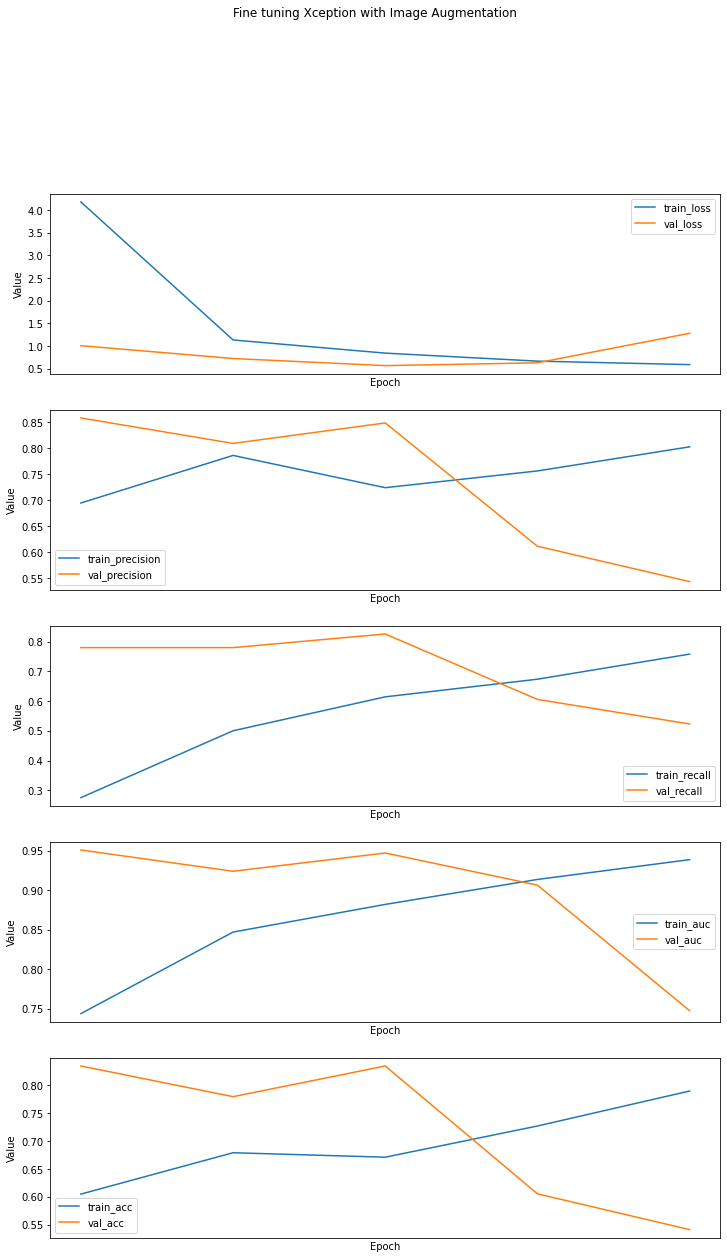

In [13]:
import matplotlib.pyplot as plt
import numpy as np
 
f, ax = plt.subplots(5, 1, figsize=(12, 20))
t = f.suptitle('Fine tuning Xception with Image Augmentation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

keys = list(history.history.keys())
metrics = [(keys[i], keys[i+5]) for i in range(len(keys)//2)]

epochs = len(history.history['acc'])
epoch_list = list(range(1,epochs+1))
for i, (train, test) in enumerate(metrics):
  ax[i].plot(epoch_list, history.history[train], label=f'train_{train}')
  ax[i].plot(epoch_list, history.history[test], label=f'{test}')
  ax[i].set_xticks(np.arange(0, epochs, 5))
  ax[i].set_ylabel('Value')
  ax[i].set_xlabel('Epoch')
  ax[i].legend(loc="best")


## Plot Confusion Matrix

In [14]:
import numpy as np

filenames = test_generator.filenames
nb_samples = len(filenames)

predictions = model.predict(test_generator, steps = nb_samples)
y_pred = np.rint(predictions)
y_pred = tf.argmax(y_pred, axis=1)

y_true = test_generator.classes

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

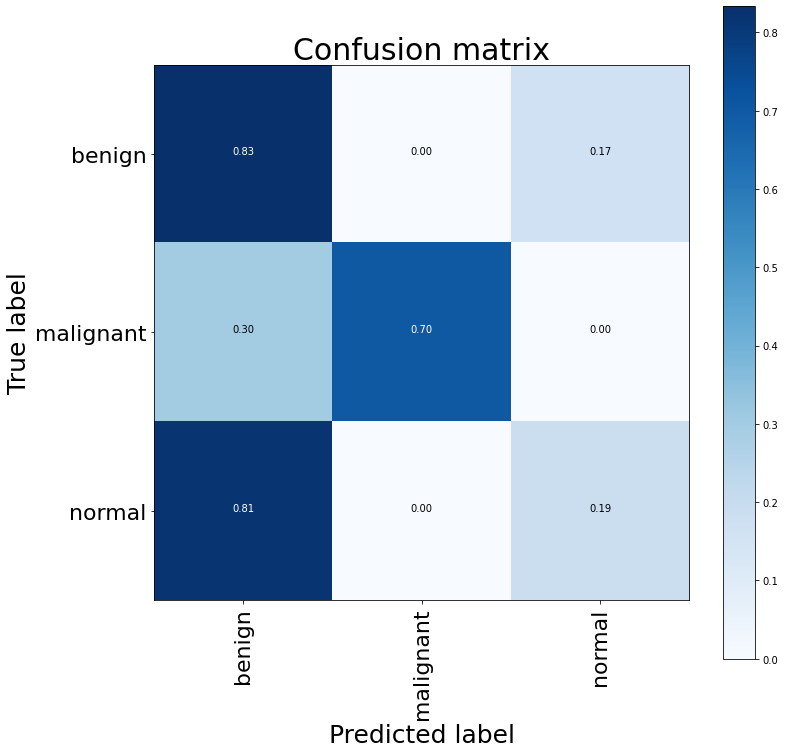

In [16]:
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=validation_generator.class_indices.keys(), title="Confusion matrix")
plt.show()

In [17]:
model.evaluate(test_generator)

112/112 [==============================] - 2s 16ms/step - loss: 1.2828 - precision: 0.5370 - recall: 0.5179 - auc: 0.7397 - acc: 0.5357


[1.2828397750854492,
 0.5370370149612427,
 0.5178571343421936,
 0.7396764159202576,
 0.5357142686843872]

## Save Model

In [ ]:
model.save('model')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: model/assets


In [ ]:
!zip -r /content/ResNet_upweight_model.zip /content/model/

  adding: content/model/ (stored 0%)
  adding: content/model/keras_metadata.pb (deflated 96%)
  adding: content/model/assets/ (stored 0%)
  adding: content/model/saved_model.pb (deflated 92%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.index (deflated 77%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 9%)


In [ ]:
from google.colab import files

files.download('/content/ResNet_upweight_model.zip')

## Load Model

In [ ]:
from google.colab import files

uploaded_model = files.upload()

In [ ]:
import zipfile

for fn in uploaded_model.keys():
  model_path = '/content/'+ fn
  with zipfile.ZipFile(model_path, 'r') as zip_ref:
    zip_ref.extractall('/')

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/model')